# HEART DISEASE PREDICTION USING MACHINE LEARNING

# A Comprehensive Approach Involving Data Cleaning, Feature Engineering, and Model Tuning

# Loading Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Data Importation

In [5]:
data = pd.read_csv('heart-disease.csv')


In [6]:
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# Dataset Summary

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# Check for missing values

In [12]:

print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Get basic statistics

In [14]:

print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

# Handling missing values

In [16]:
data_cleaned = data.dropna()
data_cleaned = data.fillna(data.mean())

print(data_cleaned.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Handling Duplicates

In [18]:
duplicate_rows = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
data_cleaned = data_cleaned.drop_duplicates()


Number of duplicate rows: 1


# Correcting data types

In [20]:
data_cleaned['sex'] = data_cleaned['sex'].astype('category')
data_cleaned['cp'] = data_cleaned['cp'].astype('category')
data_cleaned['fbs'] = data_cleaned['fbs'].astype('category')
data_cleaned['restecg'] = data_cleaned['restecg'].astype('category')
data_cleaned['exang'] = data_cleaned['exang'].astype('category')
data_cleaned['slope'] = data_cleaned['slope'].astype('category')
data_cleaned['ca'] = data_cleaned['ca'].astype('category')
data_cleaned['thal'] = data_cleaned['thal'].astype('category')

# Handling Outliers 

In [22]:
q_low = data_cleaned['chol'].quantile(0.01)
q_high = data_cleaned['chol'].quantile(0.99)

data_cleaned = data_cleaned[(data_cleaned['chol'] > q_low) & (data_cleaned['chol'] < q_high)]


# Encoding Categorical Variables

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

ValueError: num must be an integer with 1 <= num <= 9, not 10

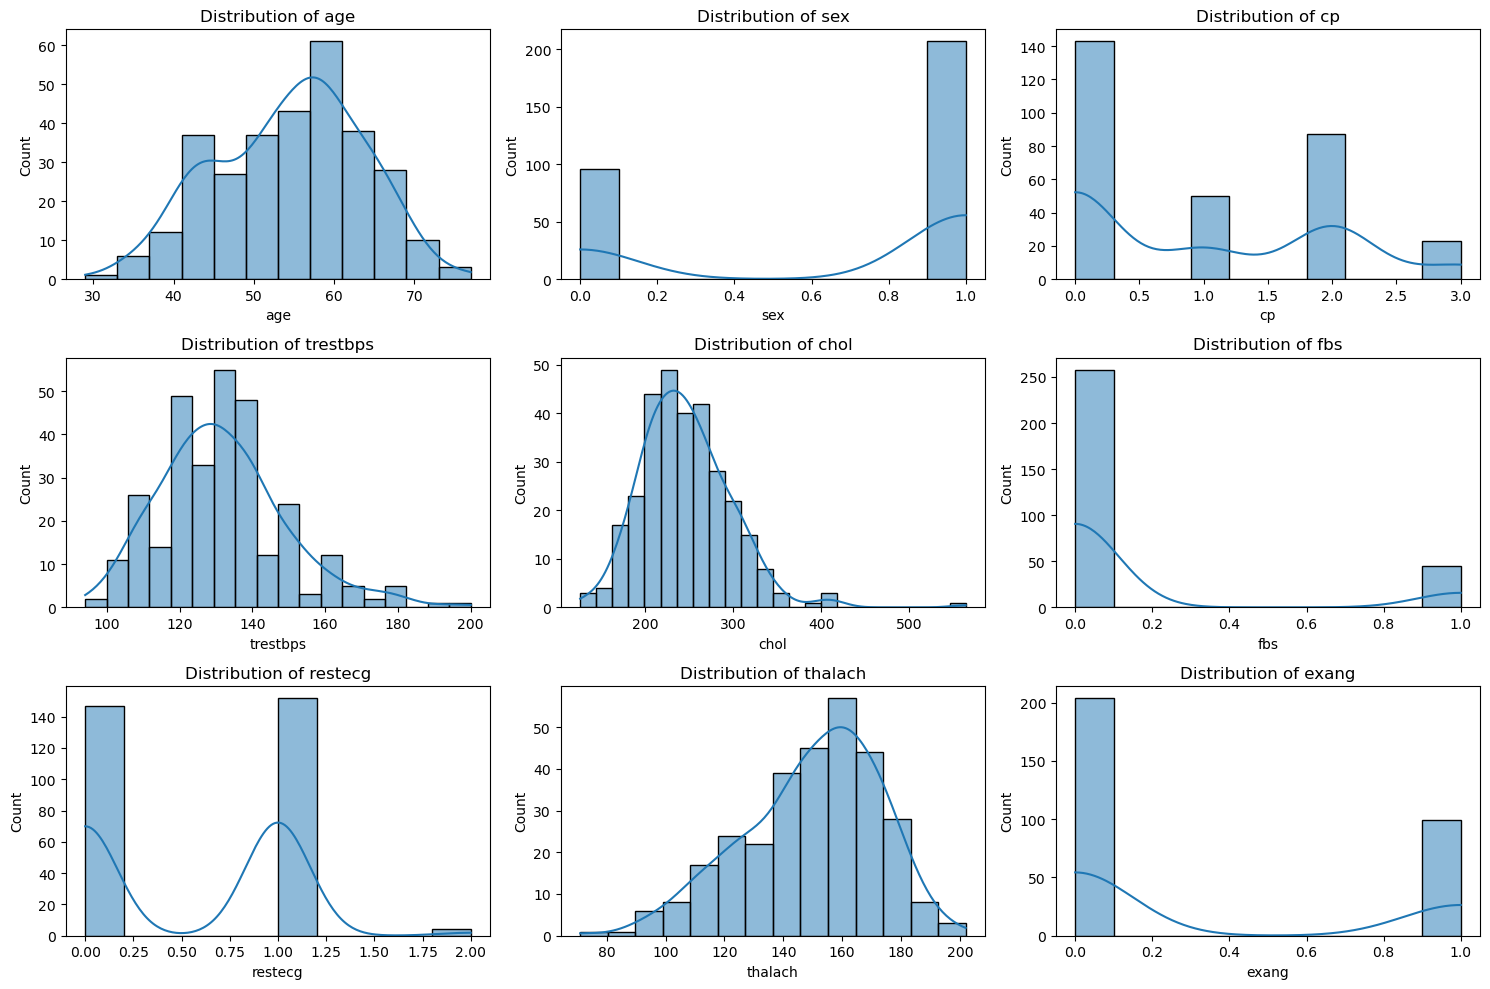

In [26]:
# Step 1: Identify numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Visualize the distribution of numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


In [99]:
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
print(data_encoded.head())

   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   63       145   233      150      2.3       1   True  False  False   True   
1   37       130   250      187      3.5       1   True  False   True  False   
2   41       130   204      172      1.4       1  False   True  False  False   
3   56       120   236      178      0.8       1   True   True  False  False   
4   57       120   354      163      0.6       1  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  False  False   False    True   
4  ...     True    False     True  False  False  False  False   False    True   

   thal_3  
0   False  
1   Fals

# Feature Scaling

In [101]:
scaler = StandardScaler()

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

print(data_encoded[numerical_cols].head())


        age  trestbps      chol   thalach   oldpeak
0  0.965486  0.756186 -0.285865  0.017111  1.092504
1 -1.915467 -0.096415  0.100958  1.630158  2.126209
2 -1.472244 -0.096415 -0.945739  0.976220  0.317226
3  0.189845 -0.664815 -0.217602  1.237795 -0.199626
4  0.300651 -0.664815  2.467403  0.583857 -0.371910


# Exploratory Data Analysis (EDA)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


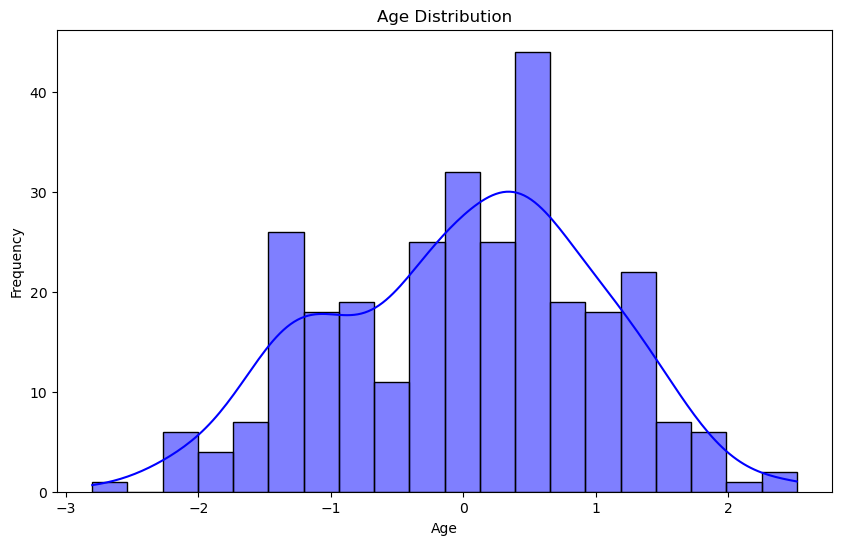

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


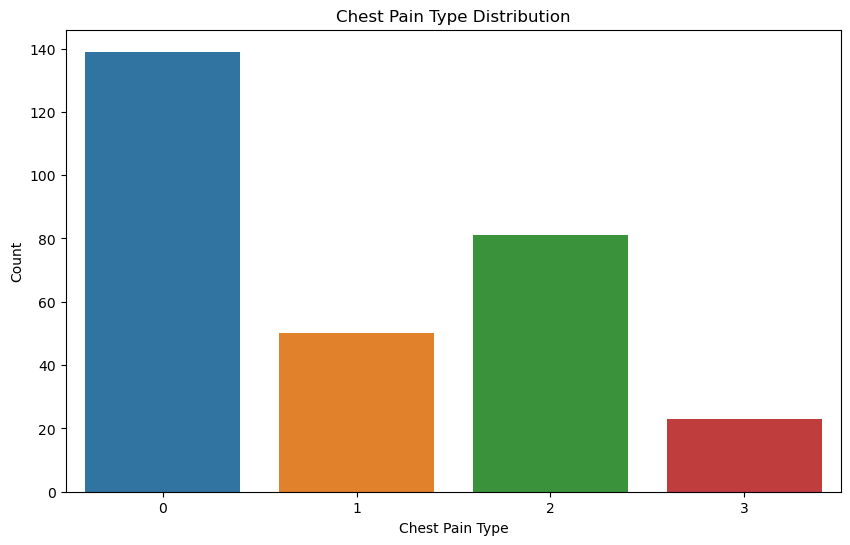

In [103]:


# Example: Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Count plot of chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=data_cleaned)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


# Feature selection

In [105]:
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Building a Machine Learning Model

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and train the model

In [56]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7213114754098361
Confusion Matrix:
 [[20  9]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



# Predictive Modeling

1. Classification: Predicting Readmissions

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



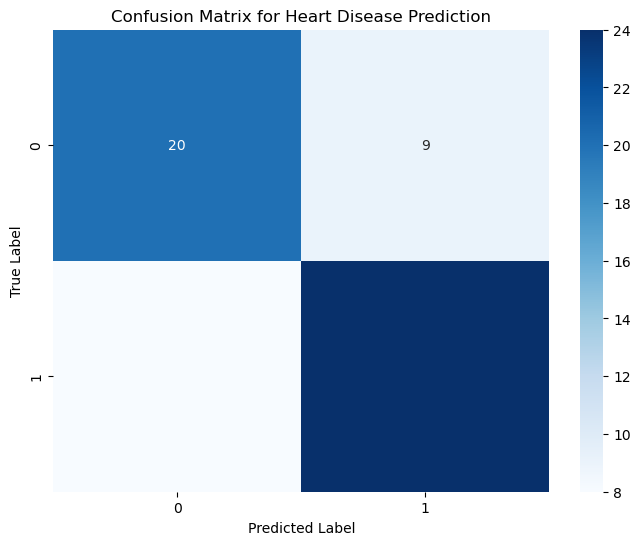

In [60]:
# Select features and target for classification
X = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Select numerical features
y = data['target']  # Target variable (e.g., presence of heart disease)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#  Regression: Predicting Cholesterol Levels

Mean Absolute Error: 0.3613114754098361


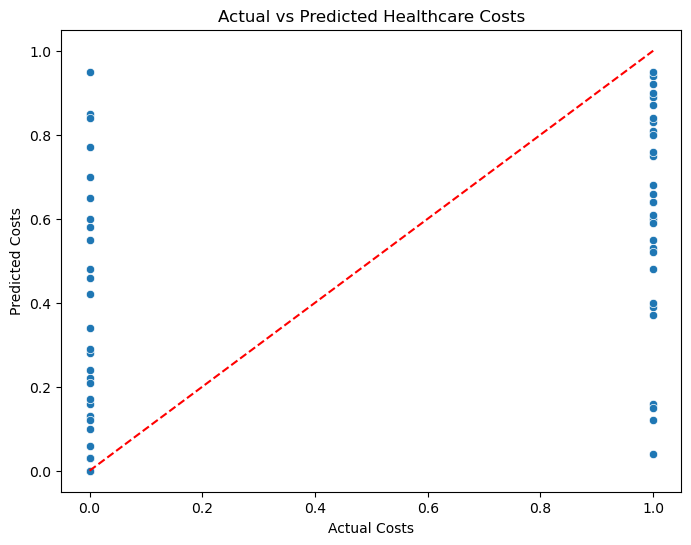

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#Select features for regression (adjust based on dataset)
X = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Replace with actual column names
y = data['target']  # Target variable (e.g., healthcare cost)

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the Random Forest Regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

#Make predictions
y_pred = reg.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualizing actual vs predicted costs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line for perfect predictions
plt.title('Actual vs Predicted Healthcare Costs')
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.show()


# Feature Engineering

# Create an interaction term between age and cholesterol
data_encoded['age_chol_interaction'] = data_encoded['age'] * data_encoded['chol']

# Check the new feature
print(data_encoded[['age', 'chol', 'age_chol_interaction']].head())


In [113]:
# Generate polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_encoded[['age', 'chol', 'thalach']])

# Convert to DataFrame and concatenate with the original data
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'chol', 'thalach']))
data_encoded = pd.concat([data_encoded, poly_df], axis=1)

# Check the new polynomial features
print(data_encoded.head())


        age  trestbps      chol   thalach   oldpeak  target  sex_1   cp_1  \
0  0.965486  0.756186 -0.285865  0.017111  1.092504     1.0   True  False   
1 -1.915467 -0.096415  0.100958  1.630158  2.126209     1.0   True  False   
2 -1.472244 -0.096415 -0.945739  0.976220  0.317226     1.0  False   True   
3  0.189845 -0.664815 -0.217602  1.237795 -0.199626     1.0   True   True   
4  0.300651 -0.664815  2.467403  0.583857 -0.371910     1.0  False  False   

    cp_2   cp_3  ... thal_3       age      chol   thalach     age^2  age chol  \
0  False   True  ...  False  0.965486 -0.285865  0.017111  0.932164 -0.275999   
1   True  False  ...  False -1.915467  0.100958  1.630158  3.669015 -0.193381   
2  False  False  ...  False -1.472244 -0.945739  0.976220  2.167502  1.392359   
3  False  False  ...  False  0.189845 -0.217602  1.237795  0.036041 -0.041311   
4  False  False  ...  False  0.300651  2.467403  0.583857  0.090391  0.741827   

  age thalach    chol^2 chol thalach thalach^2  
0

# Model Tuning and Comparison

In [115]:
from sklearn.model_selection import GridSearchCV

# Define the model and parameters to search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8203515263644773


In [117]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.7627118644067796
Logistic Regression Accuracy: 0.7627118644067796
SVM Accuracy: 0.7457627118644068
Gradient Boosting Accuracy: 0.6949152542372882


In [119]:


# Perform k-fold cross-validation (e.g., k=10)
cross_val_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=10, scoring='accuracy')

# Print the average cross-validation score
print(f"10-Fold Cross-Validation Accuracy: {cross_val_scores.mean()}")


10-Fold Cross-Validation Accuracy: 0.798735632183908


In [26]:


# Define a pipeline with scaling, feature selection, and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Pipeline Model Accuracy: {accuracy}")


Pipeline Model Accuracy: 0.7627118644067796


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define a pipeline with scaling, feature selection, and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif, k=10)),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Pipeline with Feature Selection Accuracy: {accuracy}")


Pipeline with Feature Selection Accuracy: 0.6949152542372882


In [28]:
import joblib

# Save the trained model
joblib.dump(pipeline, 'heart_disease_model.pkl')

# To load the model later
loaded_model = joblib.load('heart_disease_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {accuracy_loaded}")


Loaded Model Accuracy: 0.6949152542372882


In [29]:
# Save the cleaned and wrangled dataset to a CSV file
cleaned_data_path = 'heart_disease_cleaned.csv'
data_encoded.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to heart_disease_cleaned.csv


test

In [125]:
# Inspecting features related to cost and admissions
print(data_encoded.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3', 'age', 'chol', 'thalach', 'age^2', 'age chol',
       'age thalach', 'chol^2', 'chol thalach', 'thalach^2'],
      dtype='object')


In [127]:
# Example: Checking correlation between length of stay and cost features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_encoded, x='Length_of_stay', y='Total_cost')  # Replace with actual column names
plt.title('Length of Stay vs Total Cost')
plt.show()

# Check for patients with previous admissions
sns.countplot(data=data_cleaned, x='Readmission_status')  # Replace with actual column if available
plt.title('Distribution of Patient Readmissions')
plt.show()

# Inspect high-cost patients (e.g., top 5% of costs)
high_cost_threshold = data_encoded['Total_cost'].quantile(0.95)  # Replace with actual column
high_cost_patients = data_encoded[data_encoded['Total_cost'] > high_cost_threshold]
print("Number of High-Cost Patients:", high_cost_patients.shape[0])

ValueError: Could not interpret value `Length_of_stay` for parameter `x`

<Figure size 800x600 with 0 Axes>

In [32]:
# Check the actual column names in the dataset
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


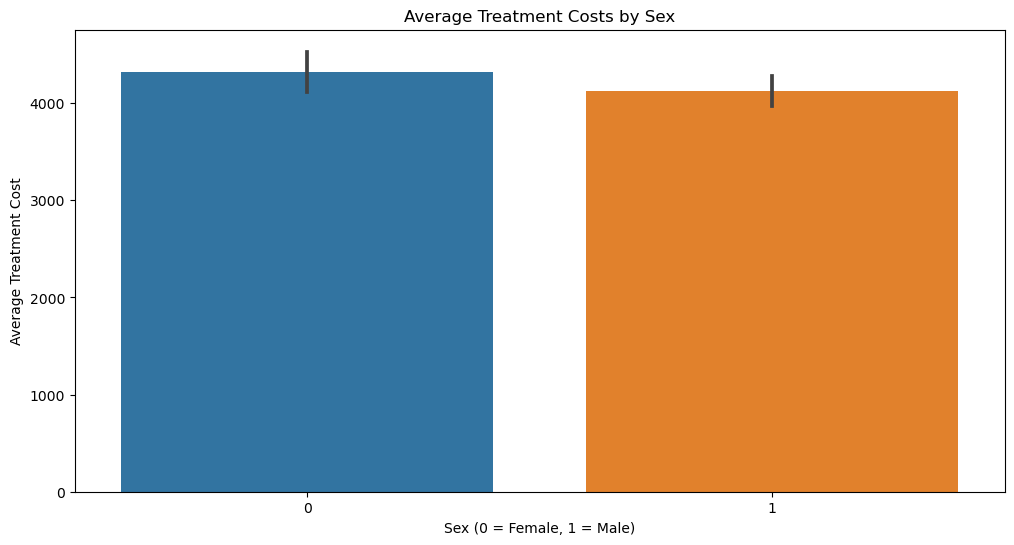

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


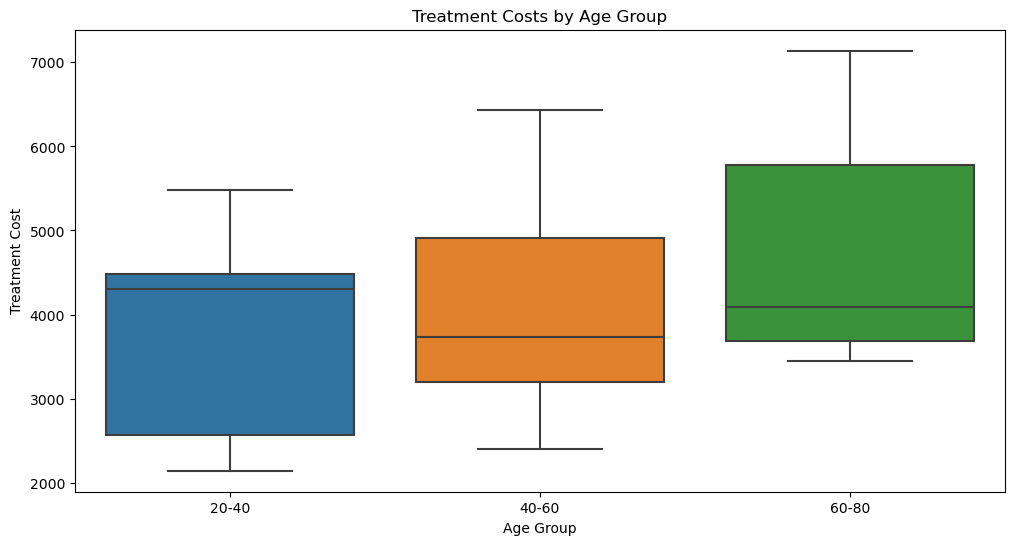

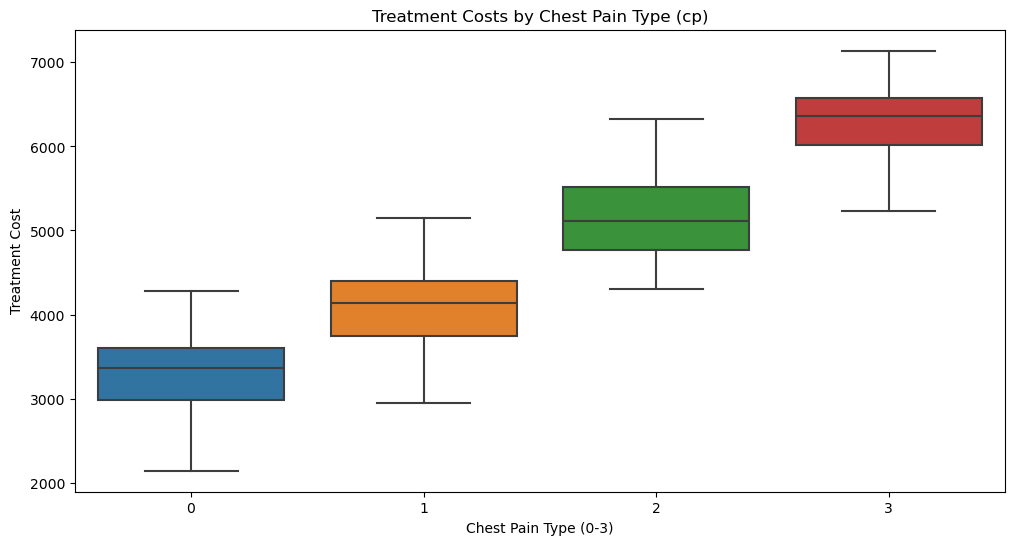

   age_group  sex  cp  treatment_cost
0      20-40    0   0     2385.624003
1      20-40    0   1     3419.045563
2      20-40    0   2     4456.049230
3      20-40    0   3             NaN
4      20-40    1   0     2396.361161
5      20-40    1   1     3121.900344
6      20-40    1   2     4363.147688
7      20-40    1   3     5385.383825
8      40-60    0   0     3161.555816
9      40-60    0   1     4009.889658
10     40-60    0   2     4987.215546
11     40-60    0   3     6297.731278
12     40-60    1   0     3134.034236
13     40-60    1   1     4025.341753
14     40-60    1   2     5038.699298
15     40-60    1   3     6114.364157
16     60-80    0   0     3688.974848
17     60-80    0   1     4942.157747
18     60-80    0   2     5811.961661
19     60-80    0   3     6820.097182
20     60-80    1   0     3785.956378
21     60-80    1   1     4746.767804
22     60-80    1   2     5821.808099
23     60-80    1   3     6700.666552


/tmp/ipykernel_163/2769702894.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = data.groupby(['age_group', 'sex', 'cp'])['treatment_cost'].mean().reset_index()


In [49]:
#Simulate 'treatment_cost' if not available in the dataset
np.random.seed(42)
data['treatment_cost'] = data['age'] * 50 + data['cp'] * 1000 + np.random.normal(500, 100, size=len(data))

#Visualize treatment costs by demographic factors (age and sex)
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='treatment_cost', data=data)
plt.title('Average Treatment Costs by Sex')
plt.ylabel('Average Treatment Cost')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

#Visualize treatment costs by age groups
data['age_group'] = pd.cut(data['age'], bins=[20, 40, 60, 80], labels=['20-40', '40-60', '60-80'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='treatment_cost', data=data)
plt.title('Treatment Costs by Age Group')
plt.ylabel('Treatment Cost')
plt.xlabel('Age Group')
plt.show()

#Visualize treatment costs by medical condition (chest pain type 'cp')
plt.figure(figsize=(12, 6))
sns.boxplot(x='cp', y='treatment_cost', data=data)
plt.title('Treatment Costs by Chest Pain Type (cp)')
plt.ylabel('Treatment Cost')
plt.xlabel('Chest Pain Type (0-3)')
plt.show()

#Summarize average treatment costs based on age, sex, and chest pain type
summary_stats = data.groupby(['age_group', 'sex', 'cp'])['treatment_cost'].mean().reset_index()
print(summary_stats)
